# KPMG - Virtual Internship

# Data Insights

In [1]:
#import libraries for data manipulation
import numpy as np
import pandas as pd

#Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('Transactions_Task2.csv') 
df2 = pd.read_csv('Customer_Demographics_Task2.csv')
df3 = pd.read_csv('Customer_Address_Task2.csv')

## Transaction

In [3]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  bool   
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  float64
 12  product_first_sold_date  19445 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 1.8+ MB


In [5]:
df1.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [6]:
df1.shape

(19445, 13)

In [7]:
data_tr = df1.copy()

In [8]:
data_tr.drop(['transaction_id', 'product_id'], axis=1, inplace=True)

In [9]:
data_tr.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012
1,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014
2,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999
3,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998
4,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015


In [10]:
data_tr.shape

(19445, 11)

## Customer demographics

In [11]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,12/10/1953,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli,Bockman,Male,81,16/12/1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin,Dearle,Male,61,20/01/1954,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,9,Mala,Lind,Female,97,10/03/1973,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8
4,10,Fiorenze,Birdall,Female,49,11/10/1988,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20


In [12]:
df2.shape

(2777, 12)

In [13]:
df2.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [14]:
data_cd = df2.copy()

### Merging Transactions and customer demographics data 

In [15]:
tr_cd_merged = pd.merge(data_tr, data_cd, on='customer_id', how='left')
tr_cd_merged.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,Kristos,Anthony,Male,19.0,11/01/1955,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,Lauree,O'Donnell,Female,89.0,04/02/1979,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
2,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,Berne,Donegan,Male,9.0,03/06/1977,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0
3,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,Titus,Worsall,Male,83.0,14/01/1962,Staff Scientist,Financial Services,Mass Customer,N,No,16.0
4,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tr_cd_merged.shape

(19445, 22)

In [17]:
tr_cd_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19445 non-null  int64  
 1   transaction_date                     19445 non-null  object 
 2   online_order                         19445 non-null  bool   
 3   order_status                         19445 non-null  object 
 4   brand                                19445 non-null  object 
 5   product_line                         19445 non-null  object 
 6   product_class                        19445 non-null  object 
 7   product_size                         19445 non-null  object 
 8   list_price                           19445 non-null  float64
 9   standard_cost                        19445 non-null  float64
 10  product_first_sold_date              19445 non-null  object 
 11  first_name                  

In [18]:
tr_cd_merged.isnull().sum()

customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
first_name                             5813
last_name                              5813
gender                                 5813
past_3_years_bike_related_purchases    5813
DOB                                    5813
job_title                              5813
job_industry_category                  5813
wealth_segment                         5813
deceased_indicator                     5813
owns_car                               5813
tenure                                 5813
dtype: int64

In [19]:
#Removing first_name and last_name columns since it will not contribute to the analysis
tr_cd_merged.drop(['first_name', 'last_name'], axis=1, inplace=True)
tr_cd_merged.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,Male,19.0,11/01/1955,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,Female,89.0,04/02/1979,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
2,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,Male,9.0,03/06/1977,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0
3,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,Male,83.0,14/01/1962,Staff Scientist,Financial Services,Mass Customer,N,No,16.0
4,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
tr_cd_merged['deceased_indicator'].value_counts()

N    13632
Name: deceased_indicator, dtype: int64

In [21]:
#Removing deceased_indicator column since all values are same and hence does not contribute analysis
tr_cd_merged.drop(['deceased_indicator'], axis=1, inplace=True)
tr_cd_merged.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,Male,19.0,11/01/1955,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
1,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,Female,89.0,04/02/1979,Clinical Specialist,Health,Mass Customer,Yes,10.0
2,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,Male,9.0,03/06/1977,Desktop Support Technician,Retail,Affluent Customer,No,22.0
3,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,Male,83.0,14/01/1962,Staff Scientist,Financial Services,Mass Customer,No,16.0
4,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Customer address 

In [22]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [23]:
df3.shape

(3999, 6)

In [24]:
df3.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [26]:
data_ca = df3.copy()

In [27]:
data_ca['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [28]:
#Removing country column as it has same values
data_ca.drop(['country'], axis=1, inplace=True)
data_ca.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9


### Merging all three datasets together

In [29]:
final = pd.merge(tr_cd_merged, data_ca, on='customer_id', how='left')
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,Male,19.0,11/01/1955,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0
1,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,Female,89.0,04/02/1979,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0
2,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,Male,9.0,03/06/1977,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0
3,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,Male,83.0,14/01/1962,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0
4,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0601 Stephen Place,2292.0,NSW,7.0


In [30]:
final.shape

(19445, 23)

In [31]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19445 non-null  int64  
 1   transaction_date                     19445 non-null  object 
 2   online_order                         19445 non-null  bool   
 3   order_status                         19445 non-null  object 
 4   brand                                19445 non-null  object 
 5   product_line                         19445 non-null  object 
 6   product_class                        19445 non-null  object 
 7   product_size                         19445 non-null  object 
 8   list_price                           19445 non-null  float64
 9   standard_cost                        19445 non-null  float64
 10  product_first_sold_date              19445 non-null  object 
 11  gender                      

In [32]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,19445.0,1739.467267,1011.889153,1.00,857.00,1741.00,2615.00,5034.00
list_price,19445.0,1107.337193,582.662400,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19445.0,555.585260,405.596541,7.21,215.14,507.58,795.10,1759.85
past_3_years_bike_related_purchases,13632.0,49.482101,28.585782,0.00,25.00,48.00,73.25,99.00
tenure,13632.0,10.747653,5.670920,1.00,6.00,11.00,16.00,22.00
postcode,19416.0,2988.921766,850.590012,2000.00,2200.00,2768.00,3754.00,4883.00
property_valuation,19416.0,7.518284,2.824195,1.00,6.00,8.00,10.00,12.00


In [33]:
final.duplicated().sum()

0

In [34]:
final.isnull().sum()

customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
gender                                 5813
past_3_years_bike_related_purchases    5813
DOB                                    5813
job_title                              5813
job_industry_category                  5813
wealth_segment                         5813
owns_car                               5813
tenure                                 5813
address                                  29
postcode                                 29
state                                    29
property_valuation              

### Dropping all rows with missing values

In [35]:
final.dropna(axis=0, inplace=True)
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,Male,19.0,11/01/1955,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0
1,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,Female,89.0,04/02/1979,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0
2,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,Male,9.0,03/06/1977,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0
3,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,Male,83.0,14/01/1962,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0
5,2339,08/03/2017,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,10/11/2006,Male,3.0,28/12/1958,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0


In [36]:
final.isnull().sum()

customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
property_valuation                     0
dtype: int64

In [37]:
final.shape

(13620, 23)

In [38]:
for col in final.columns:
    print(final[col].value_counts())
    print("-"*50)

2183    14
2476    14
3232    13
637     13
1302    13
        ..
287      1
2863     1
2326     1
3428     1
922      1
Name: customer_id, Length: 2445, dtype: int64
--------------------------------------------------
18/08/2017    58
14/02/2017    58
21/08/2017    54
31/01/2017    54
23/10/2017    52
              ..
19/10/2017    24
12/01/2017    23
29/03/2017    22
16/05/2017    22
27/03/2017    22
Name: transaction_date, Length: 364, dtype: int64
--------------------------------------------------
False    6816
True     6804
Name: online_order, dtype: int64
--------------------------------------------------
Approved     13488
Cancelled      132
Name: order_status, dtype: int64
--------------------------------------------------
Solex             2949
Giant Bicycles    2272
WeareA2B          2223
OHM Cycles        2095
Trek Bicycles     2071
Norco Bicycles    2010
Name: brand, dtype: int64
--------------------------------------------------
Standard    9776
Road        2750
Touring    

### Removing customer_id as it adds no value to the dataset

In [39]:
# final.drop(['customer_id'], axis=1, inplace=True)
# final.head()

In [40]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13620 entries, 0 to 19444
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          13620 non-null  int64  
 1   transaction_date                     13620 non-null  object 
 2   online_order                         13620 non-null  bool   
 3   order_status                         13620 non-null  object 
 4   brand                                13620 non-null  object 
 5   product_line                         13620 non-null  object 
 6   product_class                        13620 non-null  object 
 7   product_size                         13620 non-null  object 
 8   list_price                           13620 non-null  float64
 9   standard_cost                        13620 non-null  float64
 10  product_first_sold_date              13620 non-null  object 
 11  gender                      

### Converting date columns to datetime format

In [41]:
final['transaction_date' ] =  pd.to_datetime(final['transaction_date'])
final['product_first_sold_date' ] =  pd.to_datetime(final['product_first_sold_date'])
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,Male,19.0,11/01/1955,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Female,89.0,04/02/1979,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Male,9.0,03/06/1977,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,Male,83.0,14/01/1962,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0
5,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-10-11,Male,3.0,28/12/1958,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0


In [42]:
final['DOB'] =  pd.to_datetime(final['DOB'])

In [43]:
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,Male,19.0,1955-11-01,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Female,89.0,1979-04-02,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Male,9.0,1977-03-06,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,Male,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0
5,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-10-11,Male,3.0,1958-12-28,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0


In [44]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13620 entries, 0 to 19444
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13620 non-null  int64         
 1   transaction_date                     13620 non-null  datetime64[ns]
 2   online_order                         13620 non-null  bool          
 3   order_status                         13620 non-null  object        
 4   brand                                13620 non-null  object        
 5   product_line                         13620 non-null  object        
 6   product_class                        13620 non-null  object        
 7   product_size                         13620 non-null  object        
 8   list_price                           13620 non-null  float64       
 9   standard_cost                        13620 non-null  float64       
 10  product_fi

# Feature Engineering

#### Adding 'age' column

In [45]:
age_list = []
for date in final['DOB']:
    age = 2017 - date.year
    age_list.append(age)
final['age'] = age_list

In [46]:
final['age'].value_counts()

39    839
40    688
43    583
41    542
38    464
44    404
42    404
37    396
31    378
58    355
36    324
32    322
53    317
22    296
28    292
48    290
50    285
25    285
19    281
23    278
30    273
29    257
20    255
46    246
49    243
21    243
52    242
61    232
54    215
51    215
55    213
18    206
59    203
57    195
45    195
24    188
56    188
60    185
27    178
63    168
62    168
47    158
26    157
17    151
34    131
35    127
16    119
33    108
64     98
15     13
86     10
74      7
73      5
82      5
Name: age, dtype: int64

In [47]:
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,Male,19.0,1955-11-01,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0,62
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Female,89.0,1979-04-02,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0,38
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Male,9.0,1977-03-06,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0,40
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,Male,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0,55
5,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-10-11,Male,3.0,1958-12-28,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0,59


#### Removing 'DOB' column

In [48]:
final.drop(['DOB'], axis=1, inplace=True)

In [49]:
final.columns

Index(['customer_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'property_valuation', 'age'],
      dtype='object')

In [50]:
final.shape

(13620, 23)

#### Adding 'profit' column

In [51]:
final['profit'] = final['list_price'] - final['standard_cost']
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,profit
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0,62,17.87
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0,38,1702.55
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0,40,1544.61
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0,55,817.36
5,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-10-11,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0,59,709.34


#### Grouping age into different categories

In [52]:
final['age'].describe()

count    13620.000000
mean        39.796696
std         12.537677
min         15.000000
25%         30.000000
50%         40.000000
75%         49.000000
max         86.000000
Name: age, dtype: float64

In [53]:
bins= [15,25,65,100]
labels = ['Youth','Adult','Senior']
final['age_group'] = pd.cut(final['age'], bins=bins, labels=labels, right=False)
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,profit,age_group
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0,62,17.87,Adult
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0,38,1702.55,Adult
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0,40,1544.61,Adult
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0,55,817.36,Adult
5,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-10-11,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0,59,709.34,Adult


In [54]:
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,profit,age_group
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0,62,17.87,Adult
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0,38,1702.55,Adult
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0,40,1544.61,Adult
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0,55,817.36,Adult
5,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-10-11,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0,59,709.34,Adult


In [55]:
final['age_group'].value_counts()

Adult     11563
Youth      2030
Senior       27
Name: age_group, dtype: int64

In [56]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13620 entries, 0 to 19444
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13620 non-null  int64         
 1   transaction_date                     13620 non-null  datetime64[ns]
 2   online_order                         13620 non-null  bool          
 3   order_status                         13620 non-null  object        
 4   brand                                13620 non-null  object        
 5   product_line                         13620 non-null  object        
 6   product_class                        13620 non-null  object        
 7   product_size                         13620 non-null  object        
 8   list_price                           13620 non-null  float64       
 9   standard_cost                        13620 non-null  float64       
 10  product_fi

In [57]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,13620.0,1716.287959,1010.465008,1.00,830.0000,1717.00,2586.00,3497.00
list_price,13620.0,1109.912258,584.259568,12.01,575.2700,1163.89,1635.30,2091.47
standard_cost,13620.0,557.934671,408.527793,7.21,215.1400,507.58,795.10,1759.85
past_3_years_bike_related_purchases,13620.0,49.476358,28.597179,0.00,25.0000,48.00,74.00,99.00
tenure,13620.0,10.742070,5.669825,1.00,6.0000,11.00,16.00,22.00
postcode,13620.0,2998.945888,859.717084,2000.00,2197.0000,2768.00,3799.00,4883.00
property_valuation,13620.0,7.477019,2.842202,1.00,6.0000,8.00,10.00,12.00
age,13620.0,39.796696,12.537677,15.00,30.0000,40.00,49.00,86.00
profit,13620.0,551.977587,493.842502,4.80,135.3325,445.21,827.16,1702.55


In [58]:
final.describe(include='object').T

,count,unique,top,freq
order_status,13620,2,Approved,13488
brand,13620,6,Solex,2949
product_line,13620,4,Standard,9776
product_class,13620,3,medium,9478
product_size,13620,3,medium,8923
gender,13620,2,Female,6954
job_title,13620,195,Social Worker,215
job_industry_category,13620,9,Manufacturing,3322
wealth_segment,13620,3,Mass Customer,6775
owns_car,13620,2,Yes,6893


In [59]:
final.shape

(13620, 25)

In [60]:
final['customer_id'].mode()

0    2183
1    2476
Name: customer_id, dtype: int64

# EDA

In [61]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [62]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis

### list_price

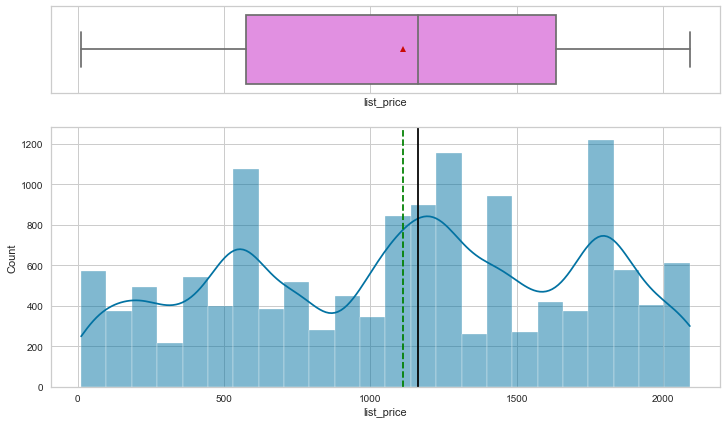

In [63]:
histogram_boxplot(final, 'list_price', kde=True)

### standard_cost

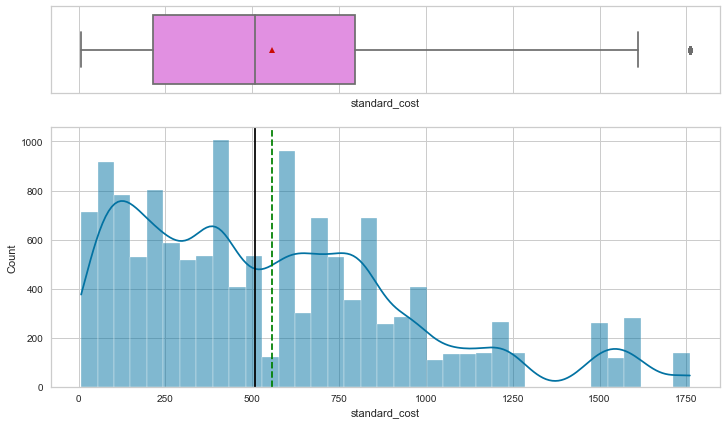

In [64]:
histogram_boxplot(final, 'standard_cost', kde=True)

### profit 

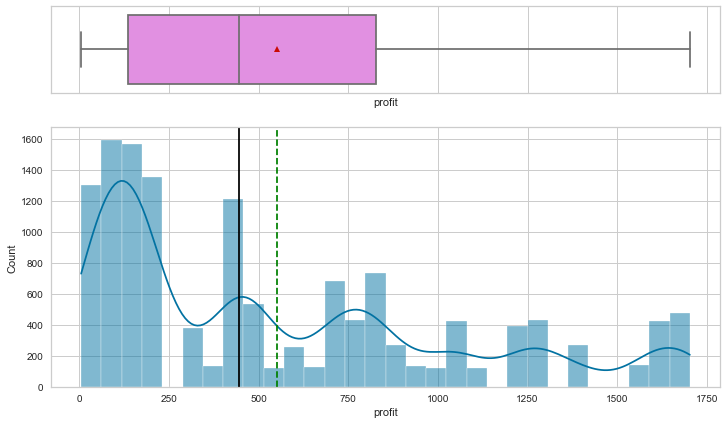

In [65]:
histogram_boxplot(final, 'profit', kde=True)

### past_3_years_bike_related_purchases 

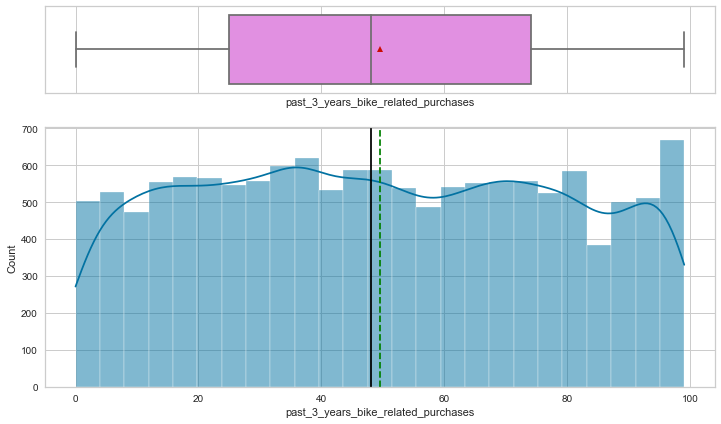

In [66]:
histogram_boxplot(final, 'past_3_years_bike_related_purchases', kde=True)

### tenure

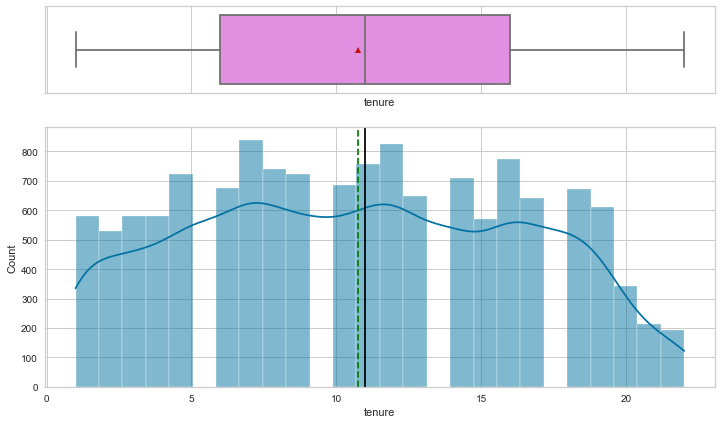

In [67]:
histogram_boxplot(final, 'tenure', kde=True)

### property_valuation

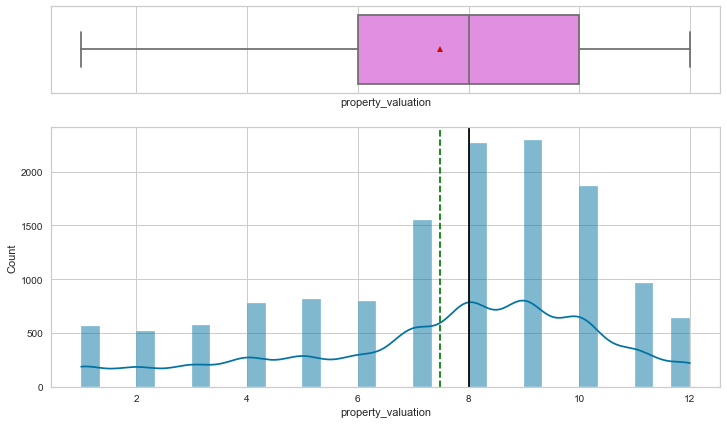

In [68]:
histogram_boxplot(final, 'property_valuation', kde=True)

### age 

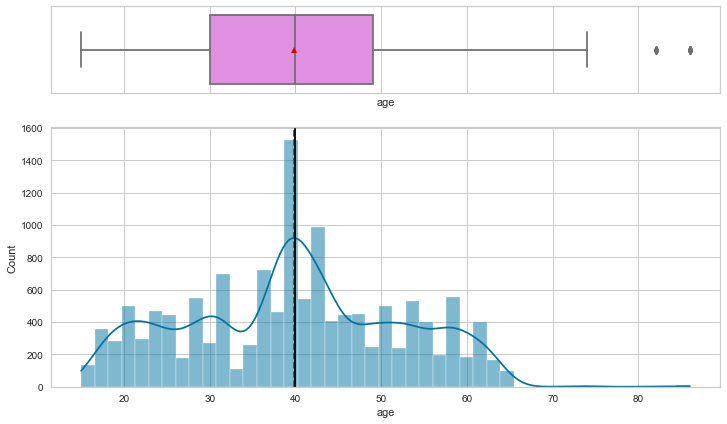

In [69]:
histogram_boxplot(final, 'age', kde=True)

### order_status

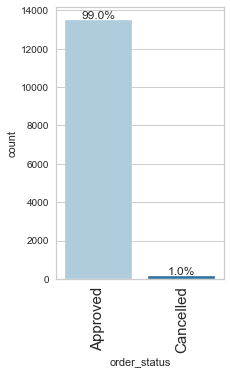

In [70]:
labeled_barplot(final, 'order_status', perc=True)

### brand

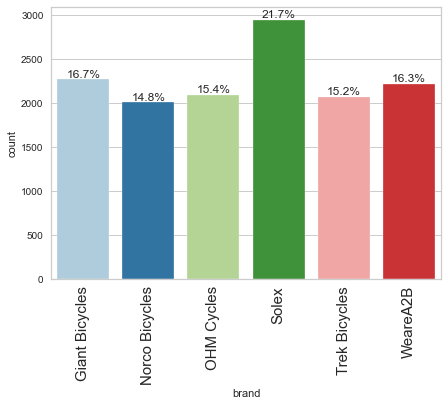

In [71]:
labeled_barplot(final, 'brand', perc=True)

### product_line 

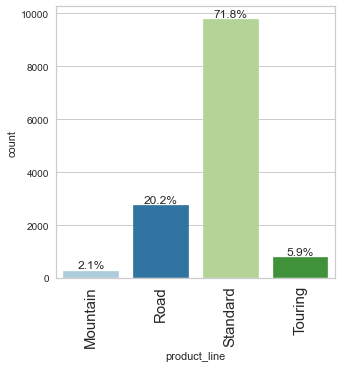

In [72]:
labeled_barplot(final, 'product_line', perc=True)

### product_class

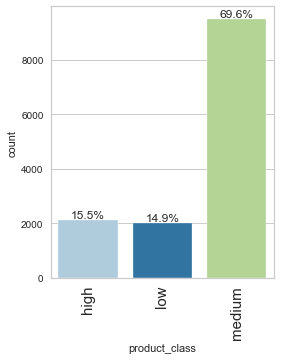

In [73]:
labeled_barplot(final, 'product_class', perc=True)

### product_size

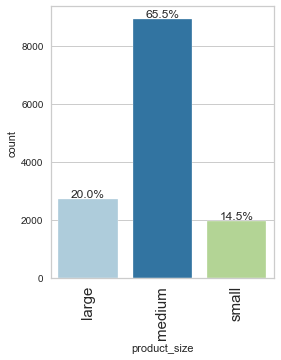

In [74]:
labeled_barplot(final, 'product_size', perc=True)

### gender

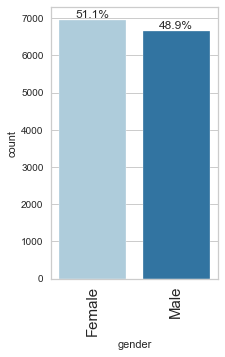

In [75]:
labeled_barplot(final, 'gender', perc=True)

### job_title 

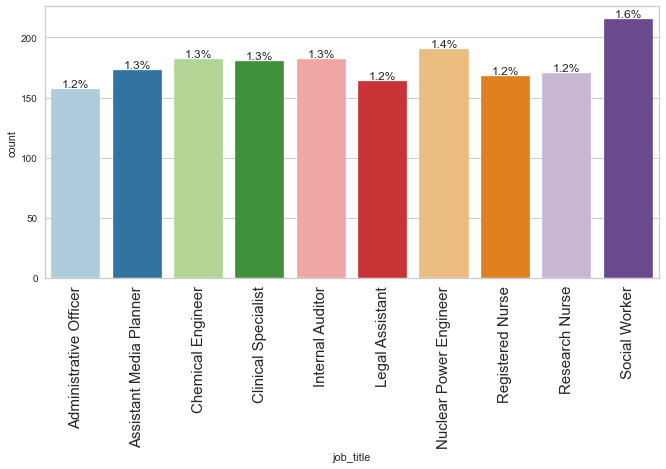

In [76]:
labeled_barplot(final, 'job_title', perc=True, n=10)

### job_industry_category

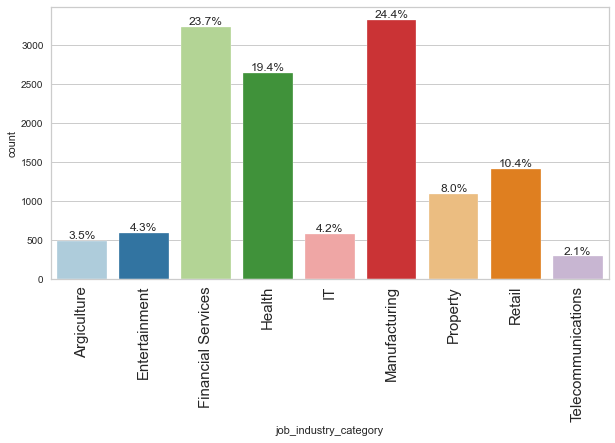

In [77]:
labeled_barplot(final, 'job_industry_category', perc=True)

### wealth_segment

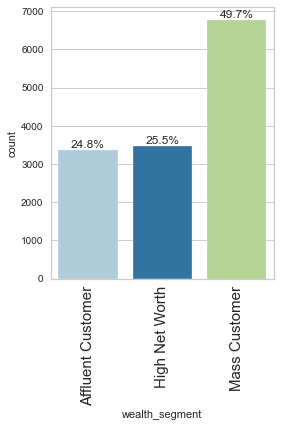

In [78]:
labeled_barplot(final, 'wealth_segment', perc=True)

### owns_car

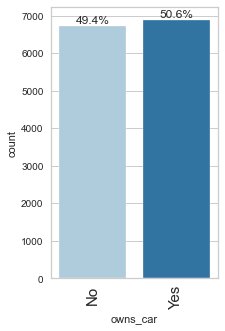

In [79]:
labeled_barplot(final, 'owns_car', perc=True)

### state

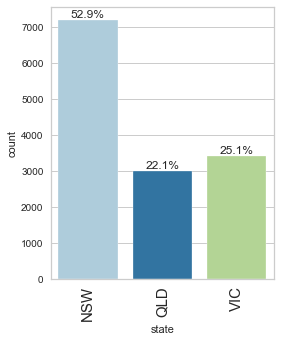

In [80]:
labeled_barplot(final, 'state', perc=True)

### age_group 

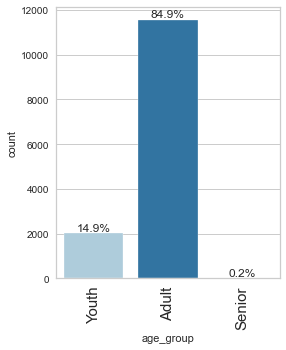

In [81]:
labeled_barplot(final, 'age_group', perc=True)

### online_order

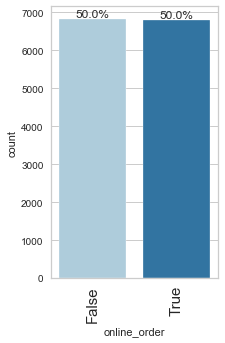

In [82]:
labeled_barplot(final, 'online_order', perc=True)

## Bivariate Analysis 

### Correlation 

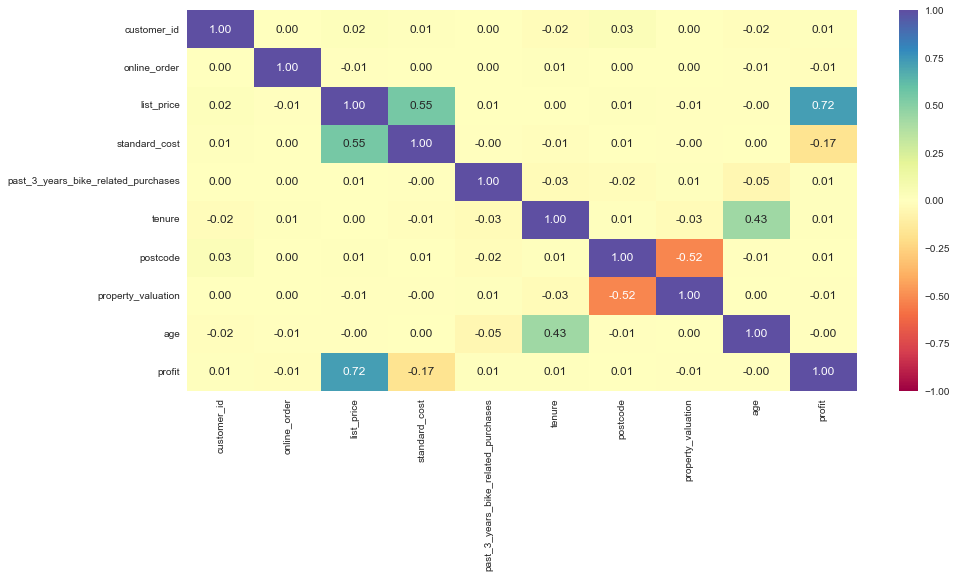

In [83]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    final.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

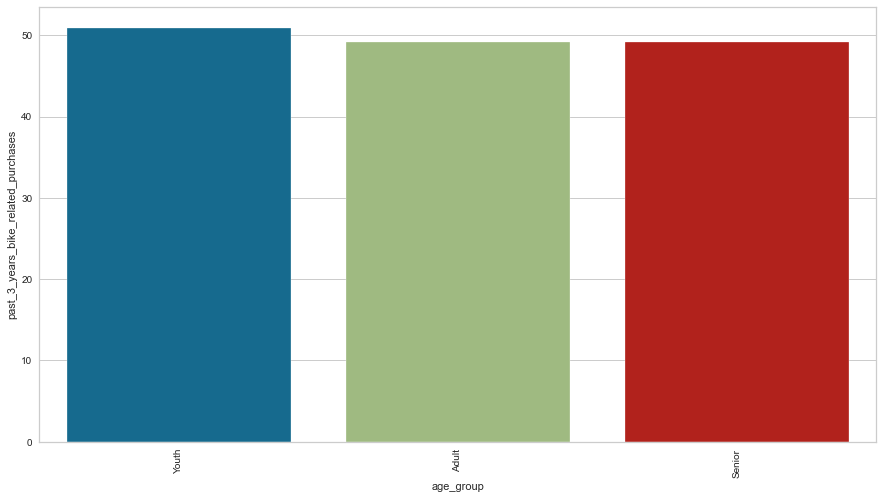

In [84]:
plt.figure(figsize=(15,8))
sns.barplot(data=final, x='age_group', y='past_3_years_bike_related_purchases', ci=False)
plt.xticks(rotation=90)
plt.show()

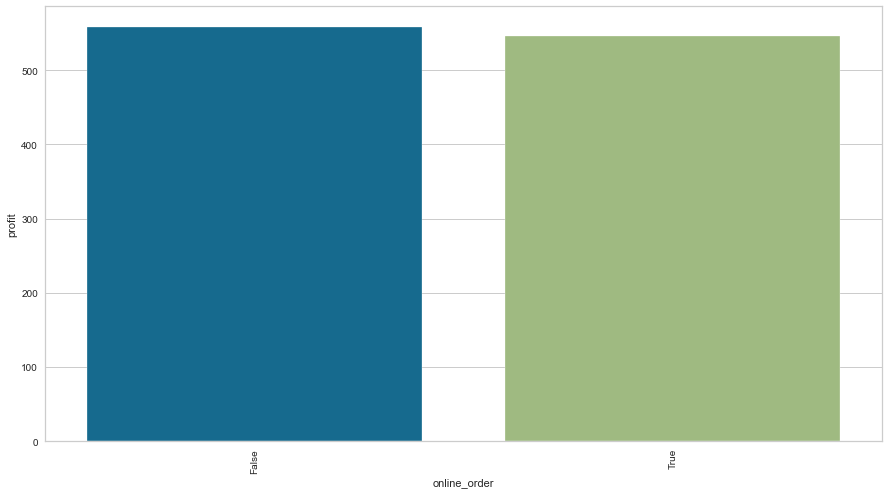

In [85]:
plt.figure(figsize=(15,8))
sns.barplot(data=final, x='online_order', y='profit', ci=False)
plt.xticks(rotation=90)
plt.show()

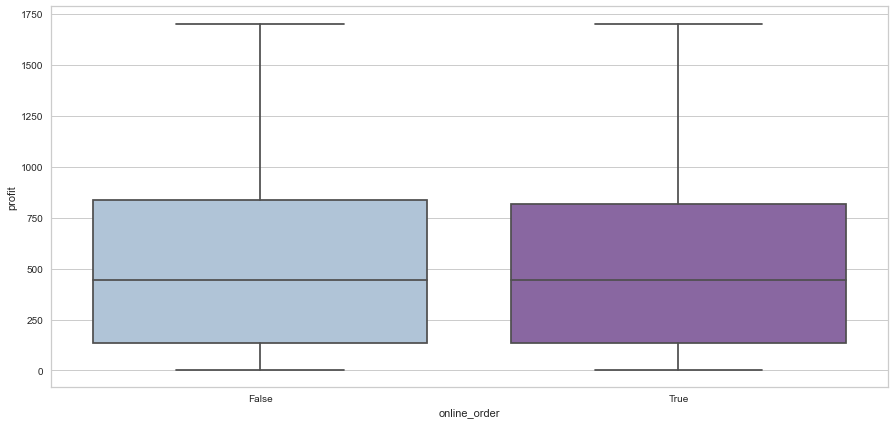

In [86]:
plt.figure(figsize=(15,7))
sns.boxplot(data = final,x = 'online_order', y = 'profit', palette = 'BuPu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

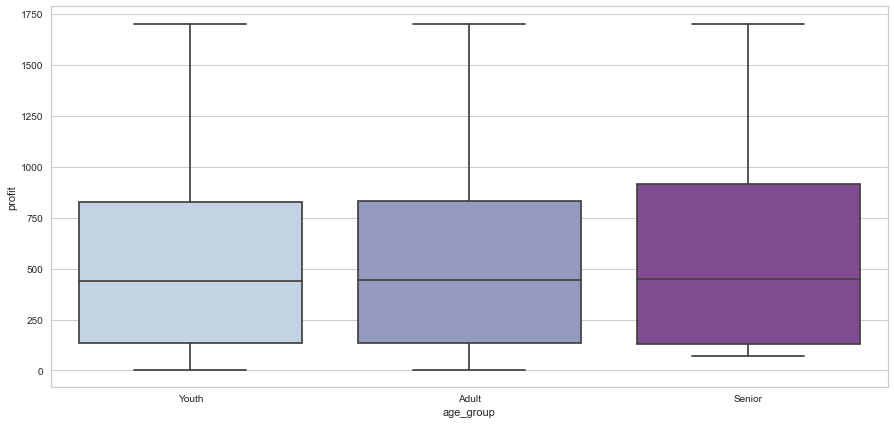

In [87]:
plt.figure(figsize=(15,7))
sns.boxplot(data = final,x = 'age_group', y = 'profit', palette = 'BuPu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

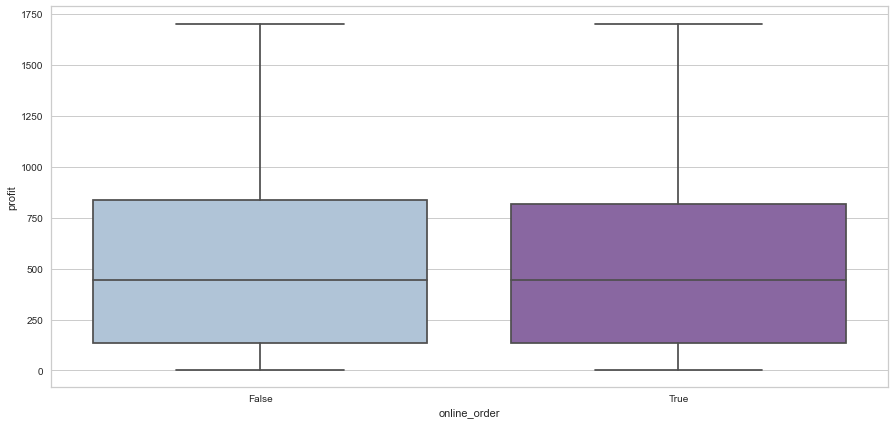

In [88]:
plt.figure(figsize=(15,7))
sns.boxplot(data = final,x = 'online_order', y = 'profit', palette = 'BuPu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

In [89]:
final.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,profit,age_group
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0,62,17.87,Adult
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0,38,1702.55,Adult
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0,40,1544.61,Adult
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0,55,817.36,Adult
5,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-10-11,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0,59,709.34,Adult


In [90]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13620 entries, 0 to 19444
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13620 non-null  int64         
 1   transaction_date                     13620 non-null  datetime64[ns]
 2   online_order                         13620 non-null  bool          
 3   order_status                         13620 non-null  object        
 4   brand                                13620 non-null  object        
 5   product_line                         13620 non-null  object        
 6   product_class                        13620 non-null  object        
 7   product_size                         13620 non-null  object        
 8   list_price                           13620 non-null  float64       
 9   standard_cost                        13620 non-null  float64       
 10  product_fi

In [91]:
final['address'].value_counts()

3 Mariners Cove Terrace      14
567 Scott Park               14
8142 Tomscot Drive           14
9427 Tennyson Plaza          13
78258 Hanover Plaza          13
                             ..
00 International Junction     1
07041 Briar Crest Lane        1
67884 Fair Oaks Parkway       1
50 Claremont Junction         1
5583 Prairie Rose Trail       1
Name: address, Length: 2444, dtype: int64

In [93]:
final.drop(['address'], axis=1, inplace=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13620 entries, 0 to 19444
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13620 non-null  int64         
 1   transaction_date                     13620 non-null  datetime64[ns]
 2   online_order                         13620 non-null  bool          
 3   order_status                         13620 non-null  object        
 4   brand                                13620 non-null  object        
 5   product_line                         13620 non-null  object        
 6   product_class                        13620 non-null  object        
 7   product_size                         13620 non-null  object        
 8   list_price                           13620 non-null  float64       
 9   standard_cost                        13620 non-null  float64       
 10  product_fi

# Model Building

### Data preparation for modeling

In [94]:
#Converting categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder

# load the dataset
model_data = final.copy()

# select the categorical variable to encode
data_types=['category', 'bool', 'object']
cat_var = list(model_data.select_dtypes(include=data_types).columns)

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the categorical variable
for col in cat_var:
    model_data[col] = le.fit_transform(model_data[col])


In [95]:
model_data.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,age,profit,age_group
0,2950,2017-02-25,0,0,3,2,2,1,71.49,53.62,2012-02-12,1,19.0,155,2,2,1,10.0,3064.0,2,6.0,62,17.87,0
1,3120,2017-05-21,1,0,4,2,2,0,2091.47,388.92,2014-03-03,0,89.0,42,3,2,1,10.0,2196.0,0,5.0,38,1702.55,0
2,402,2017-10-16,0,0,2,2,1,1,1793.43,248.82,1999-07-20,1,9.0,57,7,0,0,22.0,2835.0,0,1.0,40,1544.61,0
3,3135,2017-08-31,0,0,1,2,2,1,1198.46,381.10,1998-12-16,1,83.0,168,2,2,0,16.0,2096.0,0,10.0,55,817.36,0
5,2339,2017-08-03,1,0,0,1,2,1,1538.99,829.65,2006-10-11,1,3.0,188,6,0,1,16.0,2153.0,0,10.0,59,709.34,0


In [96]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13620 entries, 0 to 19444
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13620 non-null  int64         
 1   transaction_date                     13620 non-null  datetime64[ns]
 2   online_order                         13620 non-null  int64         
 3   order_status                         13620 non-null  int32         
 4   brand                                13620 non-null  int32         
 5   product_line                         13620 non-null  int32         
 6   product_class                        13620 non-null  int32         
 7   product_size                         13620 non-null  int32         
 8   list_price                           13620 non-null  float64       
 9   standard_cost                        13620 non-null  float64       
 10  product_fi

In [97]:
#Removing datetime datatypes
model_data.drop(['transaction_date','product_first_sold_date'], axis=1, inplace=True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13620 entries, 0 to 19444
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          13620 non-null  int64  
 1   online_order                         13620 non-null  int64  
 2   order_status                         13620 non-null  int32  
 3   brand                                13620 non-null  int32  
 4   product_line                         13620 non-null  int32  
 5   product_class                        13620 non-null  int32  
 6   product_size                         13620 non-null  int32  
 7   list_price                           13620 non-null  float64
 8   standard_cost                        13620 non-null  float64
 9   gender                               13620 non-null  int32  
 10  past_3_years_bike_related_purchases  13620 non-null  float64
 11  job_title                   

In [98]:
model_data['customer_id'].value_counts()

2183    14
2476    14
3232    13
637     13
1302    13
        ..
287      1
2863     1
2326     1
3428     1
922      1
Name: customer_id, Length: 2445, dtype: int64

In [ ]:
# model_data.drop(['customer'], axis=1, inplace=True)
# model_data.info()

In [99]:
# scaling the data before clustering
scaler = StandardScaler()
subset = model_data.copy()  
subset_scaled = scaler.fit_transform(subset)

In [100]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means clustering 

### Checking Elbow Point

In [101]:
k_means_df = subset_scaled_df.copy()

CPU times: total: 0 ns
Wall time: 998 µs
Number of Clusters: 1 	Average Distortion: 4.60383741138165
Number of Clusters: 2 	Average Distortion: 4.412240083479724
Number of Clusters: 3 	Average Distortion: 4.253133021581377
Number of Clusters: 4 	Average Distortion: 4.139300254013011
Number of Clusters: 5 	Average Distortion: 4.075780888005218
Number of Clusters: 6 	Average Distortion: 3.99977847123309
Number of Clusters: 7 	Average Distortion: 3.94949065472189
Number of Clusters: 8 	Average Distortion: 3.9031333950612295
Number of Clusters: 9 	Average Distortion: 3.871396073669677
Number of Clusters: 10 	Average Distortion: 3.8423407368316758
Number of Clusters: 11 	Average Distortion: 3.8149629165184606
Number of Clusters: 12 	Average Distortion: 3.7879205028021006
Number of Clusters: 13 	Average Distortion: 3.7682200117340887
Number of Clusters: 14 	Average Distortion: 3.741183958729124


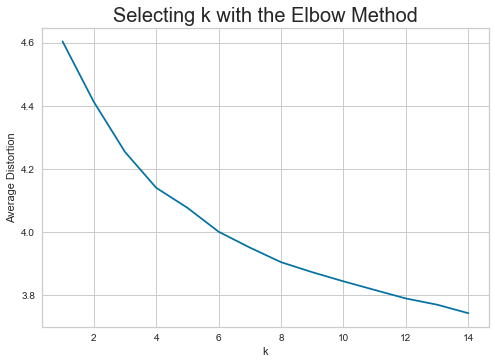

In [102]:
%time
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

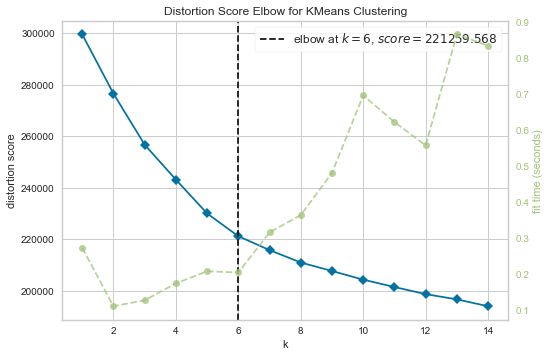

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Silhouette Scores

CPU times: total: 0 ns
Wall time: 0 ns
For n_clusters = 2, the silhouette score is 0.08037714594666376)
For n_clusters = 3, the silhouette score is 0.09199033890790538)
For n_clusters = 4, the silhouette score is 0.08579390828890275)
For n_clusters = 5, the silhouette score is 0.09108731456577682)
For n_clusters = 6, the silhouette score is 0.09008006554000826)
For n_clusters = 7, the silhouette score is 0.08280143723340948)
For n_clusters = 8, the silhouette score is 0.07990571173680726)
For n_clusters = 9, the silhouette score is 0.07373969936820739)
For n_clusters = 10, the silhouette score is 0.07614131169121985)
For n_clusters = 11, the silhouette score is 0.07934588968895201)
For n_clusters = 12, the silhouette score is 0.07397136247345792)
For n_clusters = 13, the silhouette score is 0.07301623800259038)
For n_clusters = 14, the silhouette score is 0.0722469556072669)


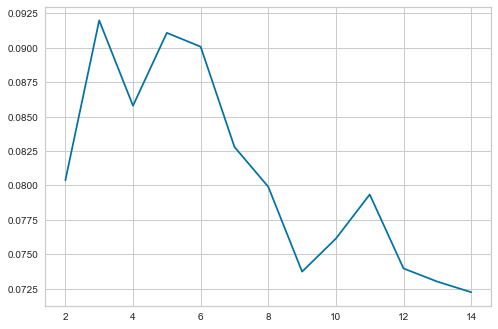

In [104]:
%time
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

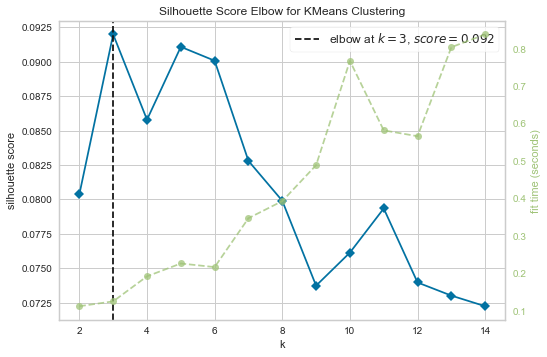

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [105]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

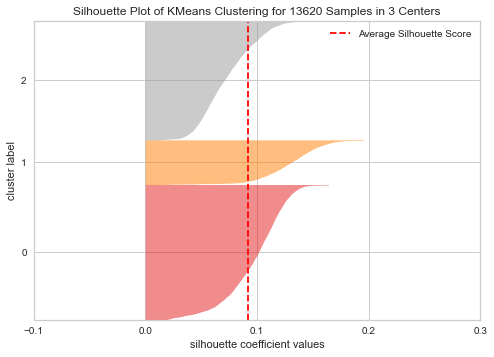

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 13620 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [106]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

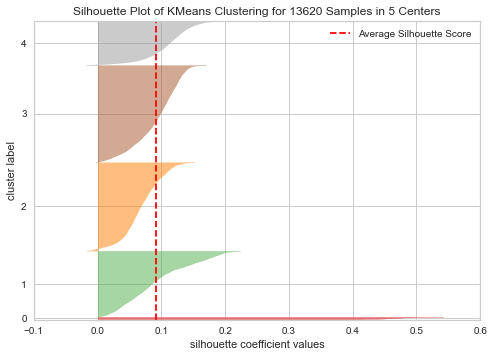

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 13620 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [107]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

### Creating final model

In [108]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)  
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [109]:
# creating a copy of the original data
df1 = model_data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_
df1.head()

,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,age,profit,age_group,KM_segments
0,2950,0,0,3,2,2,1,71.49,53.62,1,19.0,155,2,2,1,10.0,3064.0,2,6.0,62,17.87,0,2
1,3120,1,0,4,2,2,0,2091.47,388.92,0,89.0,42,3,2,1,10.0,2196.0,0,5.0,38,1702.55,0,0
2,402,0,0,2,2,1,1,1793.43,248.82,1,9.0,57,7,0,0,22.0,2835.0,0,1.0,40,1544.61,0,0
3,3135,0,0,1,2,2,1,1198.46,381.10,1,83.0,168,2,2,0,16.0,2096.0,0,10.0,55,817.36,0,0
5,2339,1,0,0,1,2,1,1538.99,829.65,1,3.0,188,6,0,1,16.0,2153.0,0,10.0,59,709.34,0,0


### Cluster profiling 

In [110]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [111]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["customer_id"].count().values 
)

In [112]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,age,profit,age_group,count_in_each_segment
KM_segments,,,,,,,,,,,,,,,,,,,,,,,
0,1680.343933,0.499351,0.010545,2.538287,1.819111,1.529040,0.940136,1108.746262,555.591377,0.473232,49.510383,99.079494,3.894387,1.239779,0.517846,11.989617,2302.146496,0.000000,8.398118,42.827872,553.154885,0.001622,6164
1,1824.899507,0.500493,0.007882,2.520197,1.809360,1.538916,0.954680,1109.144887,560.543030,0.492118,50.918719,90.939409,3.662562,1.194089,0.479803,3.508867,3030.119212,0.751724,7.432512,20.361576,548.601857,2.000000,2030
2,1716.486546,0.499447,0.009399,2.521931,1.814043,1.554736,0.945079,1111.523935,559.620829,0.506819,48.898083,95.814228,3.892739,1.281238,0.502580,12.030962,3778.855511,1.530225,6.447291,43.624401,551.903105,0.003133,5426


In [113]:
%time
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["customer_id"].unique())
    print()

CPU times: total: 0 ns
Wall time: 0 ns
In cluster 2, the following customers are present:
[2950 2459 1305 3262 2961 2268  595   76 2003 3356 1040 2916 2570  488
 3103 3108 2294 1031 1839 1824  419 3307 1346 3297 2682 3470  757  947
 1339 1397 1282 2183 1170 1940 2728 2992 3067  701  648 3286 3383  371
 2519 2264 2528 3241 1365 3349 2282 2582 1254  352  936  369   37 2325
 3487 2410 3466 2692 1580  142 1258  834 3467 1720  754 2487 3380  314
  323  923 3260 1015 2157  952 1745  372 1627 1656  506 1274  940 2354
  727 3425 2140 1887 1692 1927 3270  309  832 3484 2775 1595 3355  492
 2659 3417 1655 1194 1976  193 1132 2363  647 1001 1787  524 2676 1446
  500 1785 3073 1052 1996 1276 3013  776  246 2391 2139  333  170 1094
 1396 1979 1399 2694 3285 2510 1600 1999 2060 2175 2240 2814   29 2072
 3420  112 2874 1952  626 1747 2095 1762  836 1371 1385 1400 2285  623
  260  437 1929  364 1284 3048 1791 1721  459 2908 2419  445  255 2195
 1216 3278 1286 2701 3335 2832  666 1877  283 1030  269  7

CPU times: total: 0 ns
Wall time: 0 ns


ValueError: num must be 1 <= num <= 12, not 13

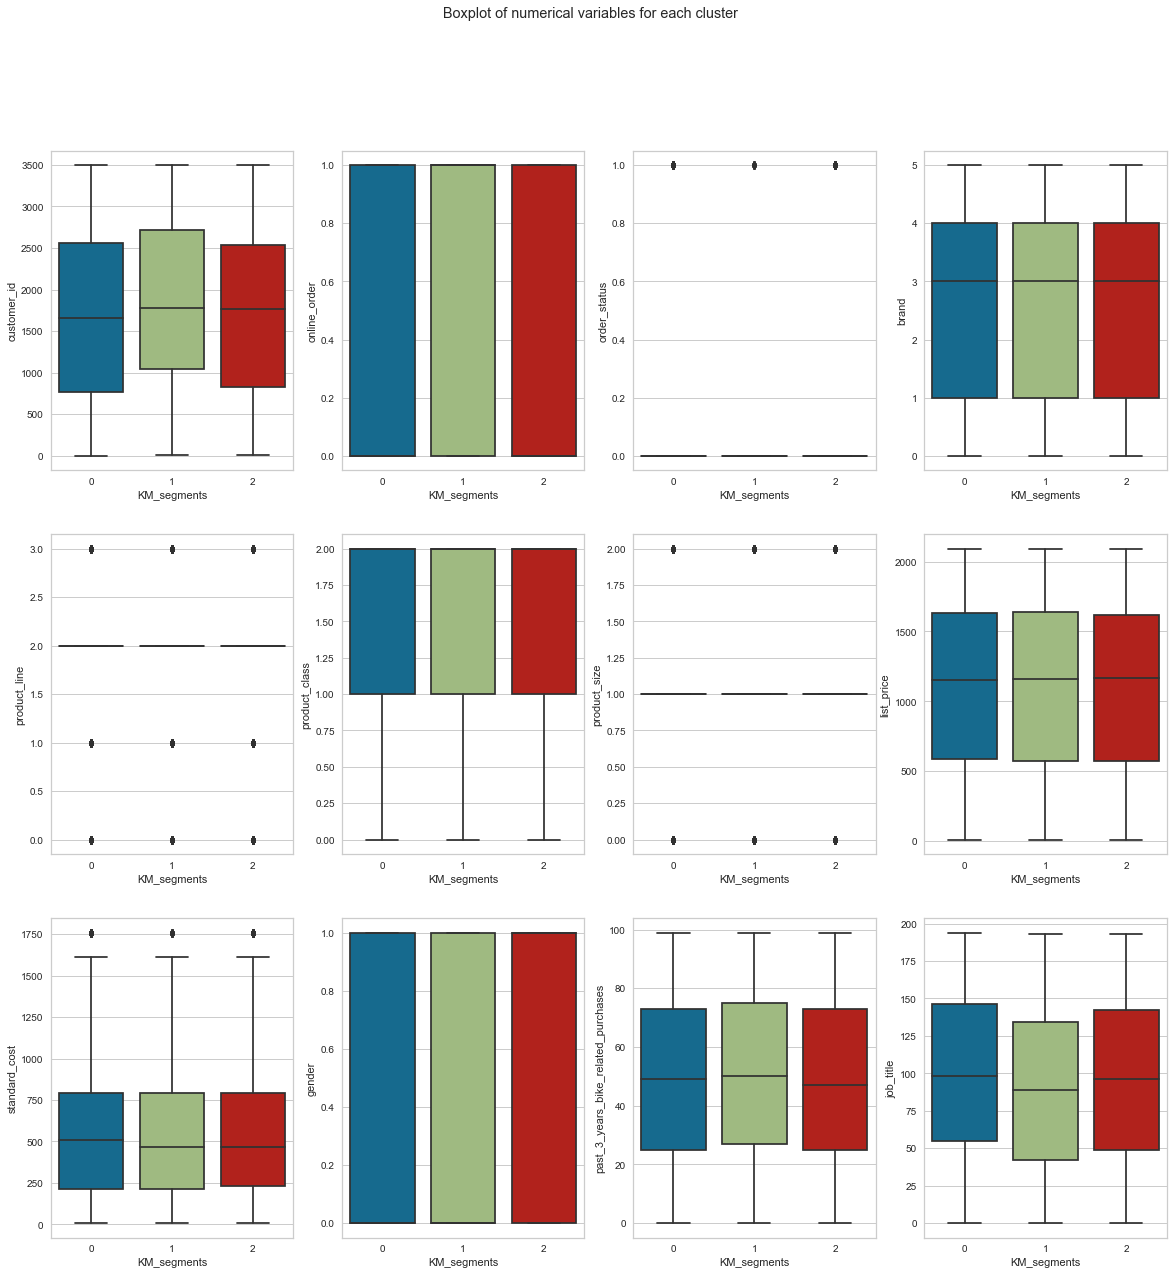

In [114]:
%time
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = model_data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

In [115]:
df1.groupby(["KM_segments", "brand"])['customer_id'].count()

KM_segments  brand
0            0        1008
             1         909
             2         986
             3        1296
             4         948
             5        1017
1            0         342
             1         288
             2         317
             3         450
             4         321
             5         312
2            0         922
             1         813
             2         792
             3        1203
             4         802
             5         894
Name: customer_id, dtype: int64

In [116]:
df1.groupby(["KM_segments", "product_line"])['customer_id'].count()

KM_segments  product_line
0            0                129
             1               1224
             2               4444
             3                367
1            0                 47
             1                401
             2               1474
             3                108
2            0                109
             1               1125
             2               3858
             3                334
Name: customer_id, dtype: int64

In [117]:
df1.groupby(["KM_segments", "product_class"])['customer_id'].count()

KM_segments  product_class
0            0                 975
             1                 953
             2                4236
1            0                 315
             1                 306
             2                1409
2            0                 823
             1                 770
             2                3833
Name: customer_id, dtype: int64

In [118]:
df1.groupby(["KM_segments", "product_size"])['customer_id'].count()

KM_segments  product_size
0            0               1255
             1               4023
             2                886
1            0                398
             1               1326
             2                306
2            0               1075
             1               3574
             2                777
Name: customer_id, dtype: int64

In [119]:
df1.groupby(["KM_segments", "gender"])['customer_id'].count()

KM_segments  gender
0            0         3247
             1         2917
1            0         1031
             1          999
2            0         2676
             1         2750
Name: customer_id, dtype: int64

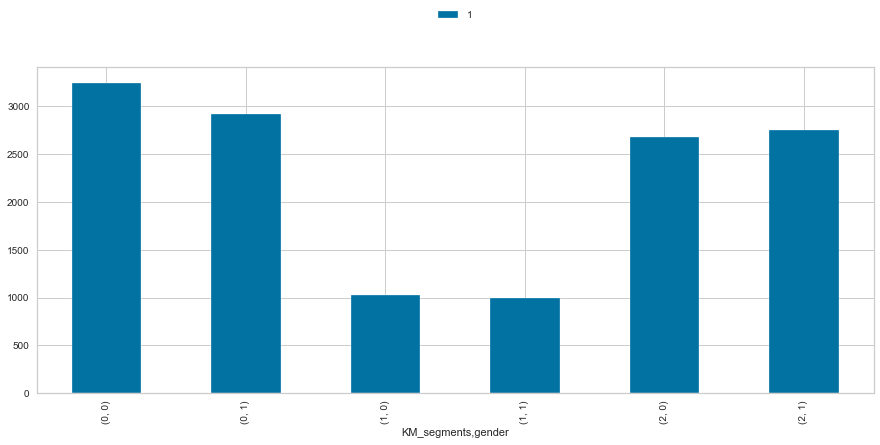

In [122]:
cols = df1.columns
gender = df1.groupby(["KM_segments", "gender"])['customer_id'].count()
gender.plot.bar(figsize=(15, 6))
plt.legend(model_data['gender'], loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3) #Positioning the legend
plt.show()

In [120]:
df1.groupby(["KM_segments", "job_title"])['customer_id'].count()

KM_segments  job_title
0            0            64
             1            53
             2            11
             3            11
             4            12
                          ..
2            189          14
             190          21
             191           9
             192           8
             193           7
Name: customer_id, Length: 498, dtype: int64

In [ ]:
df1.groupby(["KM_segments", "job_title"])['customer_id'].count()